# Intelligenza Artificiale - Lab 1

In questo laboratorio costruiremo un primo modello molto semplice (lineare) di apprendimento: il **Percettrone**. Scriveremo la sua formula matematica assieme all'algoritmo di apprendimento con cui modificheremo i suoi pesi. Infine, mostreremo la sua efficacia nell'apprendere due semplici funzioni logiche (linearmente separabili) e il suo limite nell'apprendere una funzione logica più complessa (non linearmente separabile).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Il Percettrone è un modello di apprendimento descritto dalla formula matematica: $\hat{y} = wx$, dove $x$ è l'input del modello, $\hat{y}$ è il suo output e $w$ sono i pesi del modello.
Sia $w$ che $x$ sono vettori, ossia variabili con più di un numero all'interno, mentre $\hat{y}$ è uno scalare, ossia un numero reale. Solitamente l'output viene poi *binarizzato*, utilizzando una funzione a scalino (discontinua) oppure una funzione sigmoide (continua). Quest'ultima funge da base per la derivazione della *regola delta*.

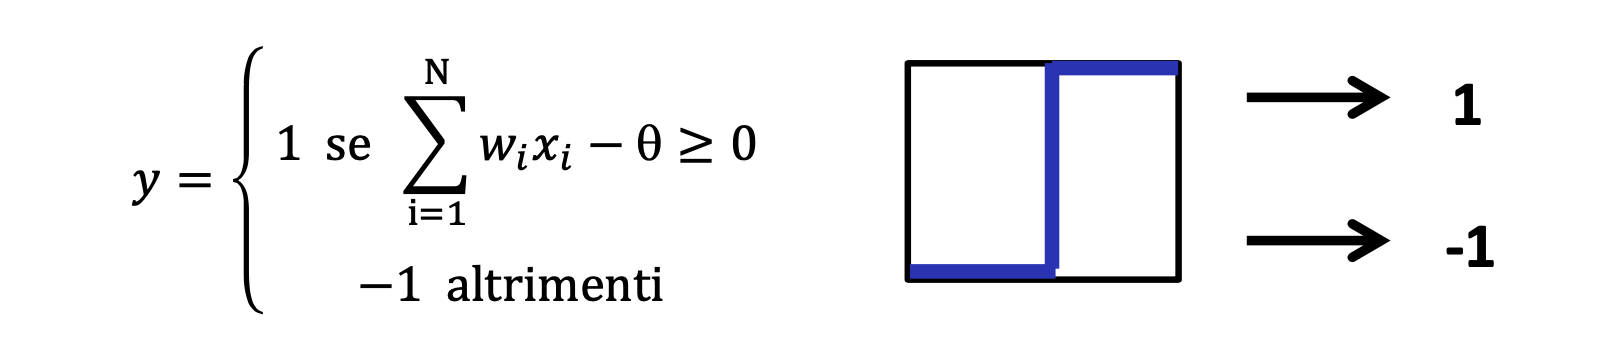

## La funzione logica AND
La funzione logica AND, anche chiamata di *congiunzione*, si può descrivere con la seguente tabella di verità.

|X|Y|X AND Y|
|-|-|-|
|F|F|F|
|F|V|F|
|V|F|F|
|V|V|V|

La tabella è in effetti quella che useremo come input per addestrare il Percettrone, usando numeri 0 e 1 per rappresentare i valori logici.

In [ ]:
input_and = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
target_and = np.array([0,
                       0,
                       0,
                       1])

La funzione logica AND viene detta *linearmente separabile* poiché, visualizzando graficamente le coppie di zero e uno in base al valore assegnato loro dalla funzione, esiste una linea che separa gli input per cui la funzione è vera (pallini rossi) da quelli per cui è falsa (pallini blu).

In [ ]:
plt.scatter(input_and[:3, 0], input_and[:3, 1])
plt.scatter(input_and[3, 0], input_and[3, 1], color='red')
plt.legend(['0', '1'])
plt.xlabel('Input 1');
plt.ylabel('Input 2');
plt.suptitle("La funzione logica AND");

In [ ]:
def target_percettrone(y): # il percettrone usa come output -1 e +1, quindi trasformiamo i valori a zero in -1
  new_y = y.copy()
  new_y[new_y == 0] = -1
  return new_y

In [ ]:
def step(x):  # define a step activation function
  if x >=0:
    return 1
  else:
    return -1

In [ ]:
def sigmoid(x):   # define a sigmoid activation function
  return 1 / (1 + np.exp(-x))

In [ ]:
def addestra_percettrone_step(inputs, targets):
  valori_errore_medio = []  # teniamo traccia degli errori del modello
  W = np.zeros(2)           # inizializziamo i parametri del Percettrone (pesi W e bias b) a zero
  b = np.zeros(1)

  learning_rate = 0.3       # specifichiamo il learning rate
  for epoca in range(100):  # ripetiamo lo step di apprendimento su tutti gli esempi per un massimo di 100 volte
    errore_medio = 0
    print("Valore attuale dei parametri W:", W, "e b:", b)
    for input, target in zip(inputs, targets):   # scorriamo tutti gli esempi
      pre_attivazione = np.dot(W, input) + b[0]  # calcoliamo il valore di pre-attivazione (somma pesata a cui sottraggo il bias)
      output = step(pre_attivazione)             # applichiamo la funzione di attivazione "a scalino" per calcolare l'output

      ### apprendimento ###
      errore = target - output
      W_delta = learning_rate * errore * input
      b_delta = learning_rate * errore
      print("input:", input, "output:", output, " \ttarget:", target, " \terrore:", errore, " \tW_delta:", W_delta, " \tb_delta:", b_delta)
      W += W_delta  # aggiorniamo il valore dei parametri (pesi sinaptici e bias) del Percettrone
      b += b_delta
      errore_medio += abs(errore) # calcoliamo l'errore medio sommando i valori assoluti dell'errore...

    errore_medio /= len(inputs)   # ...e dividendo per il numero totale di pattern (4)
    valori_errore_medio.append(errore_medio)

    print(f"Errore medio all'iterazione {epoca+1}:", errore_medio)
    print()
    if errore_medio == 0: # se l'errore raggiunge lo zero, fermiamo l'apprendimento
      break

In [ ]:
def addestra_percettrone_sigm(inputs, targets):
  valori_errore_quadratico_medio = []  # teniamo traccia degli errori del modello
  W = np.random.rand(2)                # inizializziamo i parametri del Percettrone da una distribuzione uniforme in [-1, 1]
  b = np.random.rand(1)

  learning_rate = 0.3       # specifichiamo il learning rate
  for epoca in range(500):  # ripetiamo lo step di apprendimento su tutti gli esempi per 500 volte
    errore_quadratico_medio = 0
    for input, target in zip(inputs, targets):   # scorriamo tutti gli esempi
      pre_attivazione = np.dot(W, input) + b[0]  # calcoliamo il valore di pre-attivazione
      output = sigmoid(pre_attivazione)          # applichiamo la funzione di attivazione per calcolare l'output

      ### apprendimento ###
      errore = target - output
      gradiente_W = errore * output * (1 - output)  # moltiplichiamo l'errore per la derivata della funzione di attivazione (sigmoide)
      W_delta = learning_rate * gradiente_W * input
      b_delta = learning_rate * errore
      W += W_delta  # aggiorniamo il valore dei parametri del Percettrone
      b += b_delta
      errore_quadratico_medio += errore**2

    errore_quadratico_medio /= len(inputs)
    valori_errore_quadratico_medio.append(errore_quadratico_medio)

  return valori_errore_quadratico_medio

In [ ]:
addestra_percettrone_step(input_and, target_percettrone(target_and))

In [ ]:
errori_and = addestra_percettrone_sigm(input_and, target_and)

In [ ]:
__ = plt.plot(range(len(errori_and)), errori_and)
plt.xlabel('Epochs');
plt.ylabel('Error');
plt.ylim(0, 0.4);

## La funzione logica OR
La funzione logica OR, anche chiamata di *disgiunzione*, si può descrivere con la seguente tabella di verità.

|X|Y|X OR Y|
|-|-|-|
|F|F|F|
|F|V|V|
|V|F|V|
|V|V|V|

Anche in questo caso, useremo i corrispondenti valori binari per addestrare il Percettrone su questa funzione.

In [ ]:
input_or = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])
target_or = np.array([0,
                      1,
                      1,
                      1])

Anche la funzione logica OR è linearmente separabile:

In [ ]:
plt.scatter(input_or[0, 0], input_or[0, 1])
plt.scatter(input_or[1:, 0], input_or[1:, 1], color='red')
plt.legend(['0', '1'])
plt.xlabel('Input 1');
plt.ylabel('Input 2');
__ = plt.suptitle("La funzione logica OR")

In [ ]:
addestra_percettrone_step(input_or, target_percettrone(target_or))

In [ ]:
errori_or = addestra_percettrone_sigm(input_or, target_or)

In [ ]:
__ = plt.plot(range(len(errori_or)), errori_or)
plt.xlabel('Epochs');
plt.ylabel('Error');
plt.ylim(0, 0.4);

## La funzione logica XOR
La funzione XOR (exclusive OR), o *disgiunzione esclusiva*, è rappresentata dalla tabella di verità:

|X|Y|X XOR Y|
|-|-|-|
|F|F|F|
|F|V|V|
|V|F|V|
|V|V|F|

Proveremo ad addestrare il Percettrone usando questi esempi come input ma, come vedremo, non otterremo il risultato sperato.

In [ ]:
input_xor = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
target_xor = np.array([0,
                       1,
                       1,
                       0])

Come vediamo dal grafico sottostante, la funzione XOR non è linearmente separabile, poiché non possiamo trovare nessuna linea che divida gli input per cui la funzione è vera (pallini rossi) da quelli per cui è falsa (pallini blu).

In [ ]:
plt.scatter(input_or[[0,3], 0], input_or[[0,3], 1])
plt.scatter(input_or[[1,2], 0], input_or[[1,2], 1], color='red')
plt.legend(['0', '1'])
plt.xlabel('Input 1');
plt.ylabel('Input 2');
__ = plt.suptitle("La funzione logica XOR")

In [ ]:
addestra_percettrone_step(input_xor, target_percettrone(target_xor))

In [ ]:
errori_xor = addestra_percettrone_sigm(input_xor, target_xor)

In [ ]:
__ = plt.plot(range(len(errori_xor)), errori_xor)
plt.xlabel('Epochs');
plt.ylabel('Error');
plt.ylim(0, 0.4);

## Un primo caso reale

Proveremo ora ad applicare il Percettrone a un problema realistico. Useremo il dataset [heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), disponibile pubblicamente. Il campione contiene informazioni mediche su diversi soggetti, alcuni dei quali hanno patologie cardiache. Lo scopo del problema di classificazione è distinguere i soggetti che hanno una patologia da quelli sani. Si tratta quindi di un problema di **classificazione binaria**.

In [ ]:
%%capture
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

In [ ]:
import pandas as pd  # Pandas è una libreria che facilita il caricamento/salvataggio dei dati

In [ ]:
heart_disease = pd.read_csv("processed.cleveland.data",
                            names=["age", "sex", "cp", "trestbps",
                                  "chol", "fbs", "restecg", "thalach",
                                  "exang", "oldpeak", "slope", "ca", "thal", "num"],
                            na_values='?')
heart_disease = heart_disease.dropna() # scartiamo le righe che contengono dati mal formati (vuoti)
heart_disease.num = heart_disease.num.apply(lambda x: 0 if x == 0 else 1) # trasformiamo il problema in classificazione binaria: classe 0 (no disease) vs. classe 1 (diseases)
heart_disease.head(10)

Teniamo da parte trenta esempi per valutare il modello che addestreremo.

In [ ]:
heart_disease_test = heart_disease.iloc[:30, :]
heart_disease_train = heart_disease.iloc[30:, :]

Trasformiamo gli esempi e le etichette in vettori di numeri (vettori `NumPy`).

In [ ]:
hd_in_tr = heart_disease_train.loc[:, "age":"thal"].to_numpy()  # training input
hd_out_tr = heart_disease_train.num.to_numpy(dtype=np.float64)  # training output

In [ ]:
hd_in_te = heart_disease_test.loc[:, "age":"thal"].to_numpy()   # test input
hd_out_te = heart_disease_test.num.to_numpy(dtype=np.float64)   # test output

Per facilitare il processo di apprendimento normalizziamo i valori in input, affinché abbiano media 0 e varianza 1 per ogni colonna. Attenzione: dobbiamo ***utilizzare solo la media e la varianza del training set*** per standardizzare, altrimenti rischiamo di contaminare i dati di test!

In [ ]:
hd_in_tr = ((hd_in_tr - hd_in_tr.mean(axis=0)) / hd_in_tr.std(axis=0))
hd_in_te = ((hd_in_te - hd_in_tr.mean(axis=0)) / hd_in_tr.std(axis=0))

Ridefiniamo la funzione per addestrare il percettrone per cambiare il numero di parametri del modello (ora ne serviranno 13, perché abbiamo un vettore da 13 elementi in input) e cambiare il valore di alcuni iper-parametri: learning rate e numero di epoche. In più, faremo restituire dalla funzione anche i parametri addestrati del Percettrone per testarlo sull'insieme di esempi che abbiamo tenuto da parte.

In [ ]:
def addestra_percettrone_sigm(inputs, targets):
  valori_errore_quadratico_medio = []  # teniamo traccia degli errori del modello
  W = np.random.rand(13)  # inizializziamo i parametri del Percettrone da una distribuzione uniforme in [-1, 1]
  b = np.random.rand(1)

  learning_rate = 0.1  # specifichiamo il learning rate
  for epoca in range(1):  # ripetiamo lo step di apprendimento su tutti gli esempi per 500 volte
    errore_quadratico_medio = 0
    for input, target in zip(inputs, targets):  # scorriamo tutti gli esempi
      pre_attivazione = np.dot(W, input) + b[0]  # calcoliamo il valore di pre-attivazione
      output = sigmoid(pre_attivazione)  # applichiamo la funzione di attivazione per calcolare l'output

      ### apprendimento ###
      errore = target - output
      gradiente_W = errore * output * (1 - output)
      W_delta = learning_rate * gradiente_W * input
      b_delta = learning_rate * errore
      W += W_delta  # aggiorniamo il valore dei parametri del Percettrone
      b += b_delta
      errore_quadratico_medio += errore**2

    errore_quadratico_medio /= len(inputs)
    valori_errore_quadratico_medio.append(errore_quadratico_medio)

  return valori_errore_quadratico_medio, W, b

In [ ]:
errori_heart, W, b = addestra_percettrone_sigm(hd_in_tr, hd_out_tr)

In [ ]:
__ = plt.plot(range(len(errori_heart)), errori_heart)
plt.xlabel('Epochs');
plt.ylabel('Error');
plt.ylim((0,0.8));

Valutiamo ora il Percettrone sugli esempi di training e confrontiamo l'output del modello con l'output desiderato (target):

In [ ]:
preds = []
for sample in hd_in_tr:
  pred = sigmoid(W @ sample + b)
  preds.append(pred)

In [ ]:
correct = 0
print('Prob\t Out\t Target')
for p, target in zip(preds, hd_out_tr):
  binarized_output = p > 0.5
  print('%.3f \t %i \t %i' % (p, binarized_output, target))
  if binarized_output == target:
    correct = correct + 1

print('Accuracy: %.2f' % (correct / len(preds)))

Valutiamo ora il Percettrone sugli esempi di test che abbiamo escluso durante il training che abbiamo separato prima.

In [ ]:
preds = []
for sample in hd_in_te:
  pred = sigmoid(W @ sample + b)
  preds.append(pred)

In [ ]:
correct = 0
print('Prob\t Out\t Target')
for p, target in zip(preds, hd_out_te):
  binarized_output = p > 0.5
  print('%.3f \t %i \t %i' % (p, binarized_output, target))
  if binarized_output == target:
    correct = correct + 1

print('Accuracy: %.2f' % (correct / len(preds)))


Hands-on practice!

1. Crea un grafico contenente le curve di apprendimento sia della funzione AND che della funzione OR (suggerimento: leggere le specifiche della funzione [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)).
2. Prova a modificare gli iperparametri di apprendimento per velocizzare l'apprendimento e/o ridurre l'overfitting nel dataset heart disease.